In [1]:
import pickle
import pandas as pd
import numpy as np

In [15]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df = None
final_df_all = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}_rerun.pkl', 'rb') as f:
        metrics = pickle.load(f)
        results_df = pd.DataFrame(metrics)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df.loc[results_df["metric"]=='rmse','score'] = np.sqrt(results_df[results_df["metric"]=='rmse']['score'])
        results_df.loc[results_df['metric'] == 'mean_absolute_error', 'metric'] = 'mae'
        # res = results_df.groupby(['model', 'metric','n','signal_name','snr']).mean().reset_index()
        # res = res[res['metric'] == 'r2_score']
        # if final_df is None:
        #     final_df = res
        # else:  
        #     final_df = pd.concat([final_df, res])
        if final_df_all is None:
            final_df_all = results_df
        else:
            final_df_all = pd.concat([final_df_all, results_df])

In [21]:
final_df_all.groupby(['model', 'metric','n','signal_name','snr']).mean().reset_index()

,model,metric,n,signal_name,snr,rep,seed,score,run_time
0,GP_RBF,mae,1024,blocks,3.0,9.5,9.5,0.311657,3.397693
1,GP_RBF,mae,1024,bumps,3.0,9.5,9.5,0.425655,2.175708
2,GP_RBF,mae,1024,gauss,3.0,9.5,9.5,0.090143,3.139044
3,GP_RBF,mae,1024,heavi,3.0,9.5,9.5,0.134680,3.230551
4,GP_RBF,mae,1024,linear,3.0,9.5,9.5,0.183255,3.486394
...,...,...,...,...,...,...,...,...,...
157,susie_tf30,rmse,1024,bumps,3.0,9.5,9.5,1.009840,22.930687
158,susie_tf30,rmse,1024,gauss,3.0,9.5,9.5,0.247798,11.101972
159,susie_tf30,rmse,1024,heavi,3.0,9.5,9.5,0.309865,17.058679
160,susie_tf30,rmse,1024,linear,3.0,9.5,9.5,0.265349,12.179809


In [40]:
final_df_all['model'] = final_df_all['model'].replace({'VEBTF-ash_update': 'EBTF', 
                                                 'genlasso_tf0': 'genlasso-tf', 
                                                 'haar_BayesShrink': 'Wave-Bayes', 
                                                 'haar_VisuShrink': 'Wave-hard', 
                                                 'susie_tf10': 'susie-tf-10', 
                                                 'susie_tf20': 'susie-tf-20',
                                                 'susie_tf30': 'susie-tf-30',
                                                 'GP_RBF':"GP",
                                                 'btf0': 'BTF'})
final_df_all['signal_name'] = final_df_all['signal_name'].replace({'gauss': 'Gauss', 'heavi': 'HeaviSine', 'step': 'Step', 'blocks': 'Blocks', 'bumps': 'Bumps', 'linear': 'Linear'})

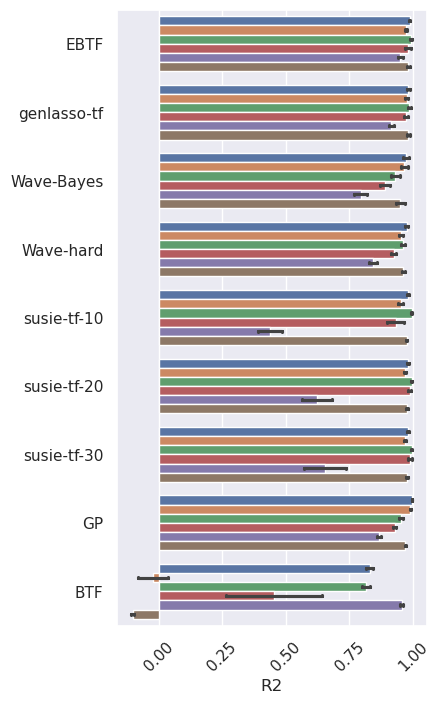

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
# Assuming df is your DataFrame
# Compute mean and standard deviation of score
# df_grouped = final_df_all[final_df_all['metric']=="rmse"].groupby(['model', 'signal_name'])['score'].agg(['mean']).reset_index()

model_order = ['EBTF', 'genlasso-tf', 'Wave-Bayes', 'Wave-hard', 'susie-tf-10', 'susie-tf-20', 'susie-tf-30', 'GP', 'BTF' ]
plt.figure(figsize=(4, 8))
sns.barplot(
    x='score',
    y='model',  # use the original score column
    hue='signal_name',
    data=final_df_all[final_df_all['metric'] == "r2_score"],
    errorbar='sd',  # 95% confidence interval
    capsize=0.1,
    order=model_order,
    orient='h'
)
plt.xlabel('R2')
plt.ylabel('')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
plt.legend().remove()
plt.savefig('simu_metric_r2.pdf', bbox_inches='tight')
plt.show()


## plot run_time vs rmse

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
metric = 'r2_score'
final_df = final_df_all[final_df_all['metric'] == metric]
final_df = final_df.drop(['metric','signal_name'], axis=1)

In [81]:
final_res = final_df.groupby(['model']).mean().reset_index()

In [82]:
final_df.model.unique()

array(['genlasso-tf', 'Wave-hard', 'Wave-Bayes', 'susie-tf-10',
       'susie-tf-20', 'susie-tf-30', 'EBTF', 'BTF', 'GP'], dtype=object)

In [83]:
final_res['model'] = final_res['model'].replace({'VEBTF-ash_update': 'EBTF', 
                                                 'genlasso_tf0': 'genlasso-tf', 
                                                 'haar_BayesShrink': 'Wave-Bayes', 
                                                 'haar_VisuShrink': 'Wave-hard', 
                                                 'susie_tf10': 'susie-tf-10', 
                                                 'susie_tf20': 'susie-tf-20',
                                                 'susie_tf30': 'susie-tf-30',
                                                 'GP_RBF':"GP",
                                                 'btf0': 'BTF'})


In [84]:
final_res

,model,n,snr,rep,seed,score,run_time
0,BTF,1024.0,3.0,9.5,9.5,0.488760,74.175442
1,EBTF,1024.0,3.0,9.5,9.5,0.977022,0.636541
2,GP,1024.0,3.0,9.5,9.5,0.950030,3.106366
3,Wave-Bayes,1024.0,3.0,9.5,9.5,0.917646,0.001068
4,Wave-hard,1024.0,3.0,9.5,9.5,0.935806,0.001576
5,genlasso-tf,1024.0,3.0,9.5,9.5,0.968658,6.815204
6,susie-tf-10,1024.0,3.0,9.5,9.5,0.878086,4.473307
7,susie-tf-20,1024.0,3.0,9.5,9.5,0.921522,10.876018
8,susie-tf-30,1024.0,3.0,9.5,9.5,0.926924,18.421133


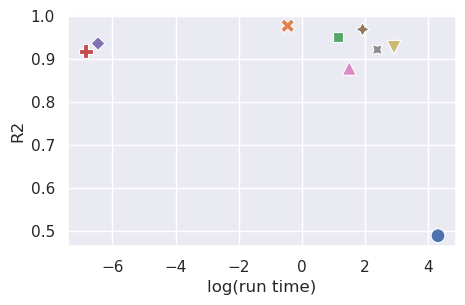

In [86]:
sns.set(style="darkgrid")
plt.figure(figsize=(5, 3))
sns.scatterplot(data=final_res, x=np.log(final_res['run_time']), 
                y=final_res['score'], hue=final_res['model'], 
                style=final_res['model'],
                markers=True, s=100)
plt.ylabel('R2')
plt.xlabel('log(run time)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3).remove() 
plt.savefig('simu_metric_runtime_r2.pdf', bbox_inches='tight')
plt.show()
